<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_ex_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1 de Regresión lineal, 10 del curso

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Carga de datos

In [14]:
ls

sample_data/  USA_Housing.csv


In [15]:
casas = pd.read_csv('USA_Housing.csv')

In [16]:
casas.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Estudio previo de los datos

In [17]:
casas.shape

(5000, 7)

In [18]:
casas.dtypes

,0
Avg. Area Income,float64
Avg. Area House Age,float64
Avg. Area Number of Rooms,float64
Avg. Area Number of Bedrooms,float64
Area Population,float64
Price,float64
Address,object


In [19]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [20]:
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


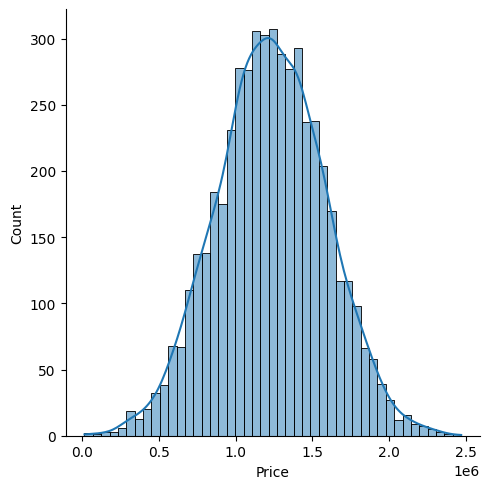

In [21]:
sns.displot(casas['Price'], kde=True)

<Axes: >

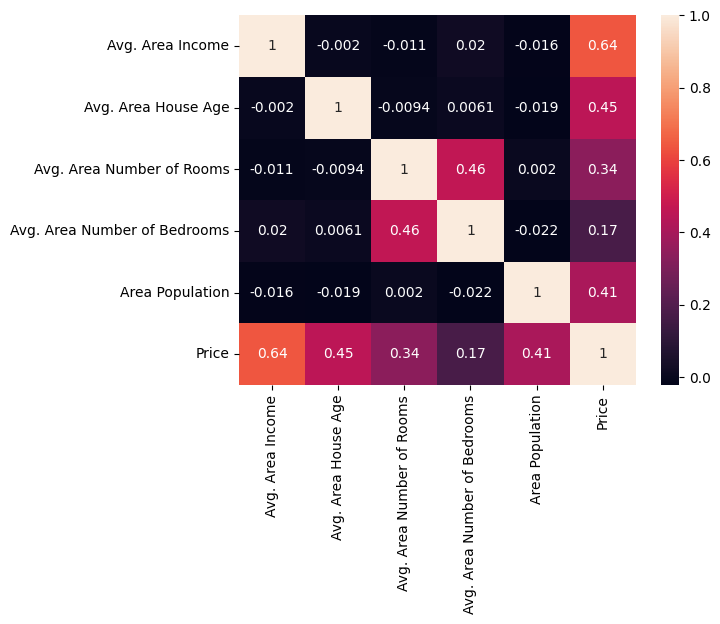

In [22]:
sns.heatmap(casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].corr(), annot=True)

## Limpieza de datos

No ha sido necesario, vienen limpios

## Separación del conjunto de datos

+ Datos de entrenamiento
+ Datos de prueba


#### Importamos las librerias propias de la regresión lineal

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Definición de la variable objetivo

Queremos estimar el precio de la vivienda. Sera la variable dependiente (Y). Todas las otras serán las variables dependientes (X=(x1, x2, x3, x4, x5)).

In [24]:
x = casas[casas.columns[0:5]]
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [25]:
y = casas['Price']
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


## Dividimos x en X_train y X_test e y en Y_train e Y_test

+ Dejamos un 30% de los datos para la prueba
+ La semilla del generador de números aleatorios es 101

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)


In [27]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2654,86690.873301,6.259901,6.676265,3.23,42589.624391
2468,59866.947700,5.870330,5.899076,4.16,32064.597156
290,74372.138452,6.562380,8.184511,6.35,34321.960155
1463,61370.323490,6.529605,6.606744,4.30,20600.511000
4508,52652.652336,5.688943,7.217268,4.06,34776.585907


In [28]:
X_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,7.427689,6.22,26008.309124
345,73643.057298,6.766853,8.337085,3.34,43152.139577
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
54,72942.705059,4.786222,7.319886,6.41,24377.909049


## Entrenamos el modelo

In [29]:
lrm = LinearRegression()

Se hace un entrenamiento sin normalizar

In [30]:
lrm.fit(X_train, Y_train)

LinearRegression()

## Probamos el modelo con los datos de test X_test obteniendo las predicciones Y_pred

In [31]:
from sklearn import metrics
Y_pred = lrm.predict(X_test)

La diferencia entre Y_pred e Y_test nos da la calidad de la predicción

<Axes: xlabel='Price'>

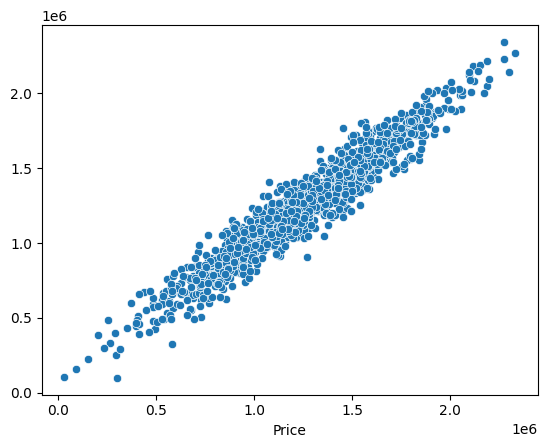

In [32]:
sns.scatterplot(x=Y_test, y=Y_pred)

Los puntos están bastante alineados a la diagonal, parece que el modelo es bueno

Esto genera un gráfico de tipo scatter donde podemos ver si creamos una línea a través del dibujo vemos que se acerca mucho a la Diagonal la diagonal indica que es el mismo valor entre el Real y la predicción por tanto como vemos que está muy cerca de la Diagonal todos los puntos vemos que el modelo es bastante bueno predice de manera bastante eficaz el precio de la casa.

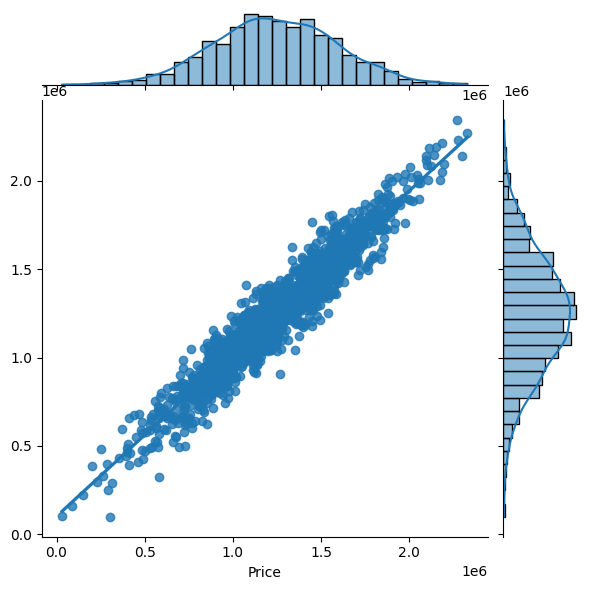

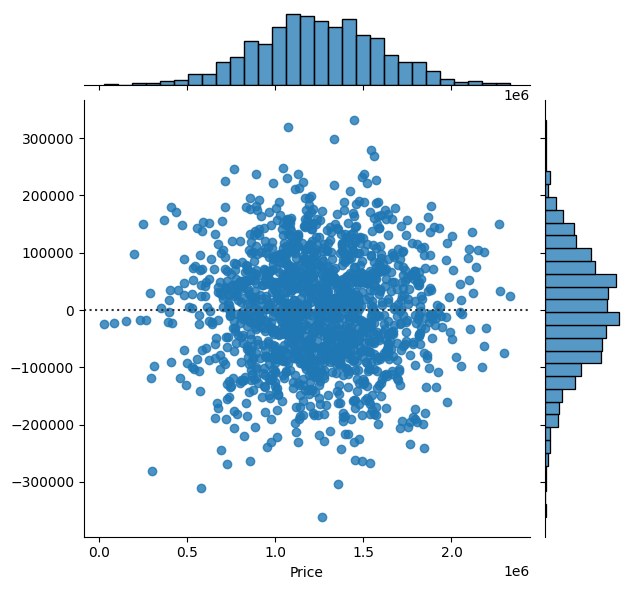

In [33]:
sns.jointplot(x=Y_test, y=Y_pred, kind='reg')
sns.jointplot(x=Y_test, y=Y_pred,  kind='resid')

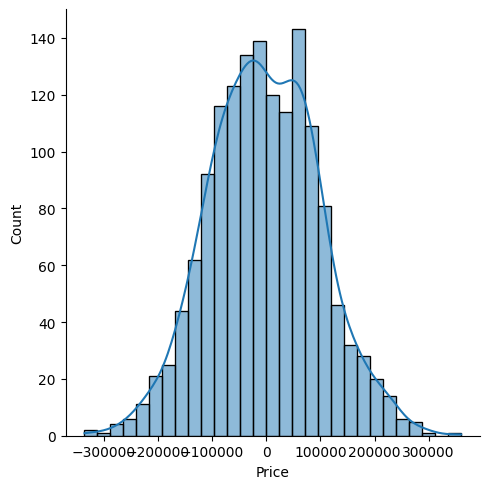

In [34]:
sns.displot(Y_test-Y_pred, kde=True)

Los errores siguen una distribución normal.
Entonces vemos la distribución de los errores.

Vemos que se acerca una distribución normal.

Esto también significa que el modelo que hemos elegido es el correcto para abordar una estimación del precio mediante regresión lineal.

De no ser esto así tendríamos que replantearnos el modelo.

## Métricas del modelo


#### MAE (Mean absolute error) Media del valor absoluto de los errores.

Cuanto menor es el MAE mejor es el modelo.

In [35]:
MAE = metrics.mean_absolute_error(Y_test, Y_pred)
print(f'MAE:{MAE:.2f}$')

MAE:81257.56$


#### MSE (Mean squared errors) Media de los errores al cuadrado.

In [36]:
MSE = metrics.mean_squared_error(Y_test, Y_pred)
print(f'MSE:{MSE:.2f}$')

MSE:10169125565.90$


#### RMSE (Root of Mean squared errors) Raiz cuadrada de la Media de los errores al cuadrado.

In [37]:
RMSE = np.sqrt(MSE)
print(f'RMSE:{RMSE:.2f}$')

RMSE:100842.08$


# Entendiendo las métricas:

## MAE  (Error Absoluto Medio)::
+ Calcula el promedio de las *diferencias absolutas* entre los valores *predichos* y los valores *reales*.
+ **Interpretación**: Representa la magnitud promedio de los errores en las *mismas unidades* que la variable objetivo. Un MAE **más bajo indica un mejor rendimiento**.
+ **Sensibilidad a los Valores Atípicos**: *Menos* sensible a los valores atípicos porque *trata todos* los errores *por igual*.

## MSE  (Error Cuadrático Medio):
+ Calcula el promedio de las *diferencias al cuadrado* entre los valores *predichos* y los valores *reales*.
+ **Interpretación**: Representa el error cuadrático promedio. Un MSE **más bajo indica un mejor rendimiento**.
+ **Sensibilidad a los Valores Atípicos**: *Más* sensible a los valores atípicos porque eleva al cuadrado los errores, dando a los errores más *grandes* un *peso* desproporcionadamente *mayor*.

## RMSE (Raíz del Error Cuadrático Medio):
+ Calcula la raíz cuadrada del MSE.
+ **Interpretación**: Representa la desviación estándar de los residuos (errores de predicción). Está en las *mismas unidades* que la variable objetivo, lo que lo hace más interpretable que el MSE. Un RMSE **más bajo indica un mejor rendimiento**.
+ **Sensibilidad a los Valores Atípicos**: Sensible a los valores atípicos, similar al MSE, porque se deriva del MSE. Sin embargo, la raíz cuadrada *reduce* el impacto de los errores muy *grandes* en comparación con el MSE.

# ¿Qué métrica es preferible?

## MAE  es preferible cuando:

+ Quieres una métrica que sea *fácil de interpretar* en las unidades originales de la variable objetivo.
+ Quieres una métrica que sea *robusta a los valores atípicos*, lo que significa que los errores grandes no influyen desproporcionadamente en la métrica.
+ Te preocupa la magnitud promedio de los errores.

## MSE  es preferible cuando:

+ Quieres *penalizar los errores más grandes de forma más severa*. Esto es útil en situaciones donde los grandes errores de predicción son más costosos que los errores pequeños.
+ Las propiedades matemáticas del MSE (como la diferenciabilidad) son beneficiosas para los algoritmos de optimización en el entrenamiento del modelo.

## RMSE  es preferible cuando:

+ Quieres una métrica que sea *interpretable* en las unidades originales de la variable objetivo (como el MAE) pero que **también** *penalice los errores más grandes* (como el MSE), aunque en menor medida que el MSE.
+ Se asume que la distribución de los errores es aproximadamente normal. En este caso, el RMSE tiene una relación más estrecha con la desviación estándar de los errores.

## ¿Cómo Comparar Dos Modelos Según Estas Métricas?

Para comparar dos modelos de regresión lineal (Modelo A y Modelo B) utilizando MAE, MSE y RMSE, calcularías cada métrica para ambos modelos **en el mismo conjunto de datos** (normalmente el conjunto de prueba, que los modelos no han visto durante el entrenamiento). Luego, compararías los valores de cada métrica:

+ Comparar MAE: El modelo con el MAE **más bajo** generalmente se considera **mejor** en términos del error absoluto promedio.

+ Comparar MSE: El modelo con el MSE **más bajo** generalmente se considera **mejo** para minimizar los errores cuadráticos. Si un modelo tiene un MSE significativamente más alto que otro, indica que comete errores más grandes con mayor frecuencia.

+ Comparar RMSE: El modelo con el RMSE **más bajo** generalmente se considera **mejor** para minimizar la magnitud de los errores, con una mayor penalización para los errores más grandes en comparación con el MAE, y el resultado está en las unidades originales.

# Consideraciones Importantes para la Comparación:

+ **Consistencia**: Siempre compara las métricas en el *mismo conjunto de datos*. Diferentes conjuntos de datos arrojarán diferentes valores de métricas.
+ **Magnitud de las Diferencias**: Considera la significancia práctica de la diferencia en los valores de las métricas. *Una pequeña diferencia podría no ser significativa en una aplicación del mundo real*.
+ **El Contexto Importa**: El "mejor" modelo depende del *problema específico* y de qué tipo de errores son más importantes de minimizar.
+ **Observa Múltiples Métricas**: A menudo es una buena práctica observar las tres métricas (MAE, MSE, RMSE) para obtener una comprensión más completa del rendimiento de los modelos. Si un modelo supera consistentemente al otro en las tres métricas, es un fuerte indicador de su superioridad.
+ **Discrepancia Entre MAE y RMSE**: Una diferencia significativa entre el RMSE y el MAE puede indicar la presencia de *valores atípicos en los errores*. Si el RMSE es mucho más alto que el MAE, sugiere que hay algunos errores grandes que son fuertemente penalizados en el RMSE.

# En resumen:

No hay una única métrica "mejor".
Valores más bajos para MAE, MSE y RMSE generalmente indican un mejor rendimiento del modelo.
Considera la sensibilidad de cada métrica a los valores atípicos y la importancia de penalizar los errores grandes según tu problema específico.
Compara los modelos basándote en las tres métricas para una evaluación más robusta.

## Bonus
El segundo punto de por qué el MSE es preferible en ciertos contextos se debe principalmente a sus propiedades matemáticas que facilitan la optimización en los algoritmos de entrenamiento, especialmente aquellos basados en el gradiente. Aquí te explico por qué:

1. Diferenciabilidad:

+ El MSE es una función diferenciable en todos sus puntos. Esto significa que podemos calcular su gradiente con respecto a los parámetros del modelo (como los coeficientes en la regresión lineal).
+ Los algoritmos de optimización basados en el gradiente, como el descenso de gradiente (y sus variantes como el descenso de gradiente estocástico y el mini-batch gradient descent), utilizan este gradiente para determinar la dirección en la que deben ajustarse los parámetros del modelo para reducir el error.
+ Una función de error diferenciable permite un proceso de optimización suave y bien definido.


2. Convexidad (para modelos lineales):

+ Para los modelos de regresión lineal, la función de pérdida MSE es convexa. Una función convexa tiene una forma de "cuenco" con un único mínimo global.
+ Esta propiedad es muy importante para los algoritmos de optimización porque garantiza que, si el algoritmo converge a un mínimo, será el mejor mínimo posible (el mínimo global), y no un mínimo local subóptimo.
+ El cálculo del gradiente en una función convexa siempre apunta directamente hacia la dirección del mínimo global.


3. Magnitud del Gradiente:
+ El gradiente del MSE es proporcional a la magnitud del error. Errores más grandes producen gradientes más grandes, lo que resulta en actualizaciones de parámetros más significativas. Esto ayuda al modelo a aprender rápidamente de los errores grandes.
+ A medida que los errores se hacen más pequeños cerca del mínimo, el gradiente también disminuye, lo que lleva a pasos de optimización más pequeños y una convergencia más fina.

En contraste, el MAE:
+ **No es diferenciable en cero**: La función de valor absoluto en el MAE tiene una "esquina" en cero, donde la derivada no está definida. Esto puede causar problemas para los algoritmos de optimización basados en el gradiente, ya que no hay una dirección clara de descenso en ese punto.
+ **Puede llevar a oscilaciones**: Debido a la no diferenciabilidad en cero, los algoritmos de optimización pueden oscilar alrededor del mínimo en lugar de converger suavemente.


En resumen:

El MSE es beneficioso para los algoritmos de optimización basados en el gradiente porque es una función de pérdida suave y diferenciable (y convexa para modelos lineales), lo que permite un proceso de optimización más eficiente y confiable para encontrar los mejores parámetros del modelo. Esta es una razón clave por la que el MSE es una opción popular como función de pérdida en muchos algoritmos de aprendizaje automático para tareas de regresión.

# bonus 2

##¿Por qué es importante la normalización para la regresión lineal?

Aunque un modelo de regresión lineal básico puede funcionar sin normalización, a menudo es beneficioso aplicarla por las siguientes razones:

+ **Sensibilidad a la escala de las características**: Si las características tienen escalas muy diferentes (por ejemplo, una característica varía entre 0 y 1, mientras que otra varía entre 1000 y 1000000), las características con valores más grandes pueden tener una influencia desproporcionada en el modelo durante el entrenamiento. La normalización ayuda a que todas las características contribuyan de manera más equitativa.
+ **Convergencia más rápida de los algoritmos de optimización**: Los algoritmos de optimización basados en gradiente (como los que a menudo se utilizan internamente para entrenar modelos lineales) pueden converger más rápidamente cuando las características están en una escala similar. Unas escalas muy diferentes pueden hacer que el algoritmo zigzaguee y tarde más en encontrar el mínimo de la función de coste.
+ **Prevención de problemas numéricos**: En algunos casos, las grandes diferencias de escala pueden llevar a problemas de inestabilidad numérica durante los cálculos.

## ¿Cómo se realiza la normalización?

La normalización se realiza utilizando técnicas de escalado como:

+ **Estandarización (StandardScaler)**: Escala las características para que tengan una media de 0 y una desviación estándar de 1.
+ **MinMaxScaler**: Escala las características a un rango específico (generalmente entre 0 y 1).
+ **RobustScaler**: Similar a StandardScaler, pero es más robusto a los valores atípicos.

In [40]:
from sklearn.preprocessing import StandardScaler
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el escalador ajustado en los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo de regresión lineal
lrm = LinearRegression()

# Entrenar el modelo con los datos normalizados
lrm.fit(X_train_scaled, Y_train)

LinearRegression()

La razón por la que se utilizan dos métodos diferentes del scaler para normalizar los datos de entrenamiento (`fit_transform`) y los datos de prueba (`transform`) es crucial para evitar el data leakage (fuga de datos) y asegurar una evaluación realista del rendimiento del modelo.

Aquí te explico detalladamente por qué:

1. Evitar el Data Leakage:

  + El escalador aprende los parámetros de escalado (media, desviación estándar, valores mínimo y máximo, etc.) únicamente de los datos de entrenamiento.
  + Si ajustáramos el escalador a todo el conjunto de datos (entrenamiento + prueba) antes de dividirlo, o si ajustáramos un escalador diferente a los datos de prueba, estaríamos **introduciendo información del conjunto de prueba en el proceso de entrenamiento**. Esto se conoce como data leakage.
  + El data leakage puede llevar a una sobreestimación del rendimiento del modelo en los datos de prueba, ya que el modelo habría "visto" indirectamente estadísticas de los datos de prueba durante el preprocesamiento. Esto haría que la evaluación del modelo no fuera representativa de su rendimiento en datos nuevos y no vistos.

2. Simular el escenario del mundo real:

  + En un escenario real, cuando despliegas tu modelo, solo tendrás acceso a los nuevos datos que quieres predecir. No tendrás la "visión" de todo el conjunto de datos futuro para calcular estadísticas de normalización.
  + Al ajustar el escalador solo con los datos de entrenamiento y luego usar ese mismo escalador para transformar los datos de prueba, estamos simulando este escenario del mundo real. El modelo solo aprende de los datos de entrenamiento y luego se evalúa en datos completamente nuevos, preprocesados de la misma manera que se esperaría en producción.


En resumen:

+ fit_transform(X_train): Este método se utiliza solo en los datos de entrenamiento. Primero, calcula las estadísticas necesarias para el escalado (media, desviación estándar, etc.) a partir de los datos de entrenamiento y luego aplica la transformación a esos mismos datos.
+ transform(X_test): Este método se utiliza en los datos de prueba (y en cualquier dato nuevo que quieras predecir en el futuro). **Aplica la transformación utilizando las estadísticas aprendidas del conjunto de entrenamiento con el fit() anterior**. No se recalculan nuevas estadísticas a partir de los datos de prueba.


Analogía:

Imagina que estás entrenando a un chef (tu modelo) para cocinar una receta.

  + **Entrenamiento**: El chef aprende las técnicas de cocina (los parámetros del modelo) basándose en los ingredientes y las instrucciones que le das (los datos de entrenamiento). También aprende cómo cortar y preparar los ingredientes (el escalador se ajusta a los datos de entrenamiento).
  + **Prueba**: Le das al chef nuevos ingredientes (los datos de prueba) y le pides que cocine la receta utilizando las técnicas que aprendió y la forma en que aprendió a preparar los ingredientes durante el entrenamiento (el escalador ya ajustado transforma los datos de prueba). No le permites aprender nuevas técnicas de cocina basándose en estos nuevos ingredientes durante la prueba.

De esta manera, la evaluación de la habilidad del chef (el rendimiento del modelo) es justa y realista, basada en lo que aprendió durante el entrenamiento y aplicado a datos completamente nuevos.